In [22]:
import os
from Core.DataLoader import GoalCalibrationDataset
from utils import DATA_DIR
import matplotlib.pyplot as plt
from Core.helpers import to_numpy
import numpy as np
import cv2
import json
import torch
from Core.plottools import target_to_keypoints
from tqdm import tqdm
# def main():
data = GoalCalibrationDataset(DATA_DIR)
# for im,target


In [23]:
cal_qual_list = [json.load(open(path, 'r', encoding='latin'))['CalibrationQuality'] for path in tqdm(data.calibration_list)]

100%|██████████| 854/854 [00:00<00:00, 9605.23it/s]


In [33]:
from scipy import stats
print(f'Average Calibration Quality among all photos (not filtered): {np.mean(cal_qual_list)}')
print(f'Mode Calibration Quality among all photos (not filtered): {sorted(cal_qual_list)[int(len(cal_qual_list)/2)]}')

Average Calibration Quality among all photos (not filtered): 89.17969379679374
Mode Calibration Quality among all photos (not filtered): 94.09661757401575


In [39]:
br = np.array(box[2:])+np.array([1000,0])
print(br)
np.array([val if val <= tim.permute(2,1,0).shape[i] else tim.permute(2,1,0).shape[i] for i,val in enumerate(br)])

[4998 2329]


array([4208, 2329])

In [40]:
tim.permute(2,1,0).shape

torch.Size([4208, 3120, 3])

In [31]:
plt.imread(data.img_list[83]).shape
# img.shape

(1920, 2560, 3)

In [28]:
img = cv2.imread(data.img_list[83])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
np.transpose(img,axes=(1,0,2)).shape

(2560, 1920, 3)

tensor([[  39.4611,  871.9579, 4073.2972, 2417.1790]], dtype=torch.float64)
kps:
tensor([[ 266.4843, 1070.6527],
        [3846.2742, 1027.9579],
        [ 123.6211, 2261.1790],
        [3989.1372, 2249.6843]])
box:
[39, 871, 4073, 2417]
id:
tensor([46])


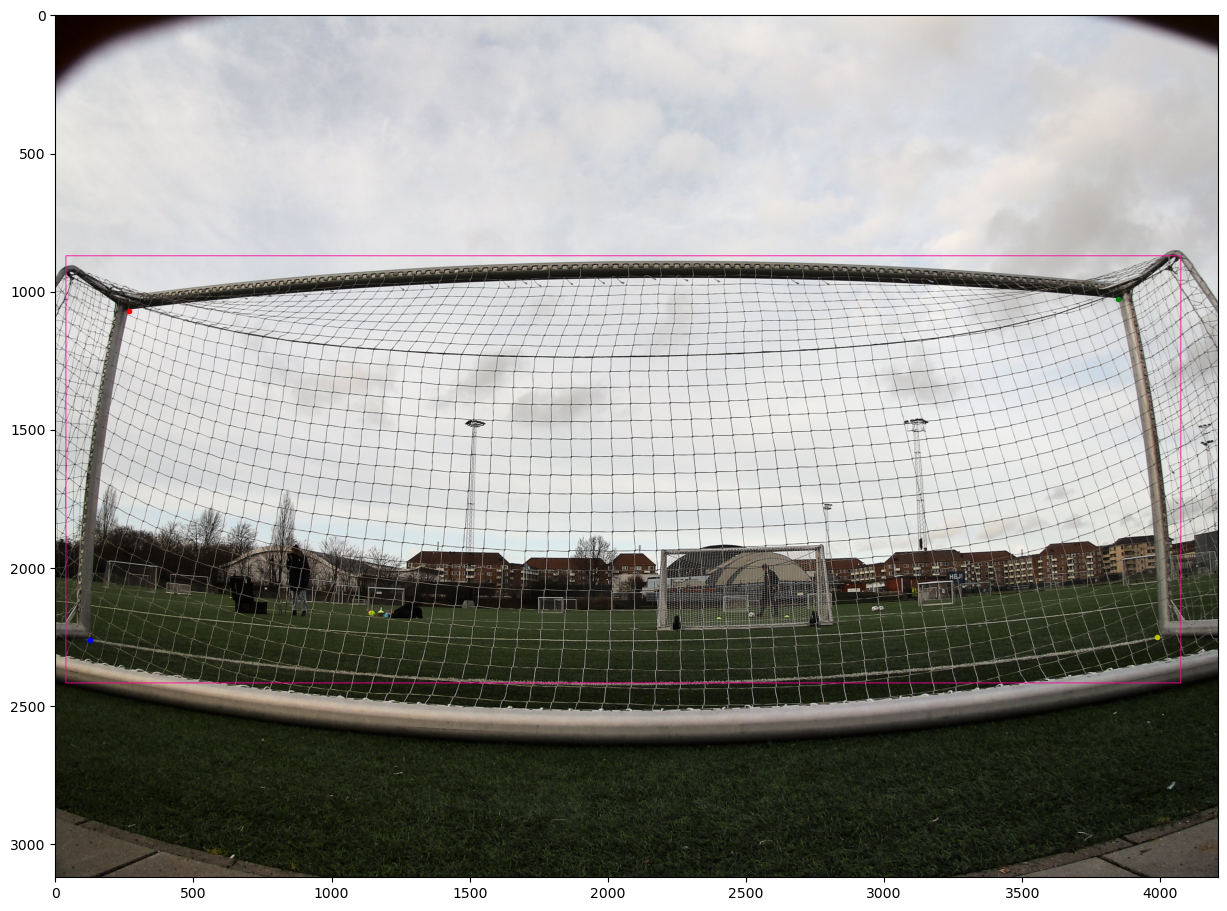

In [19]:
tim, ttarget = data.__getitem__(46)
_,ax = plt.subplots(1,1, figsize=(15,15))

kps = target_to_keypoints(ttarget)
boxes = ttarget['boxes']
print(boxes)
boxes = boxes.detach().cpu().numpy().astype(np.int32).tolist()
box = boxes[0]
id = ttarget['image_id']
print(f'kps:\n{kps}')
print(f'box:\n{box}')
print(f'id:\n{id}')
ax.plot(*kps[0],'r.')
ax.plot(*kps[1],'g.')
ax.plot(*kps[2],'b.')
ax.plot(*kps[3],'y.')
start_point = (box[0], box[1])
end_point = (box[2], box[3])
image = cv2.rectangle((to_numpy(tim)* 255).astype(np.uint8).copy(), start_point, end_point, (255,0,150), 2)
ax.imshow(image)


In [25]:
tim.shape


torch.Size([3, 3120, 4208])

In [ ]:
tim, ttarget = data.__getitem__(83)
cal_json = json.load(open(data.calibration_list[83],'r',encoding='latin'))
kp_list = cal_json['GoalCalibrationPoints']

# kp = torch.tensor(kp)
print(kp_list)

tl = np.min(kp_list,axis=0)-np.array([tim.shape[2]*0.05,tim.shape[1]*0.05])
# np.max(kp_list,axis=0)
br = np.max(kp_list,axis=0)+np.array([tim.shape[2]*0.05,tim.shape[1]*0.05])

np.concatenate((tl,br))





kps:
tensor([[2268.5374, 1314.6948],
        [ 468.3293,  778.1053],
        [2291.7839,  743.7473],
        [ 481.4700, 1326.8210]])
box:
[340, 647, 2419, 1422]
id:
tensor([83])


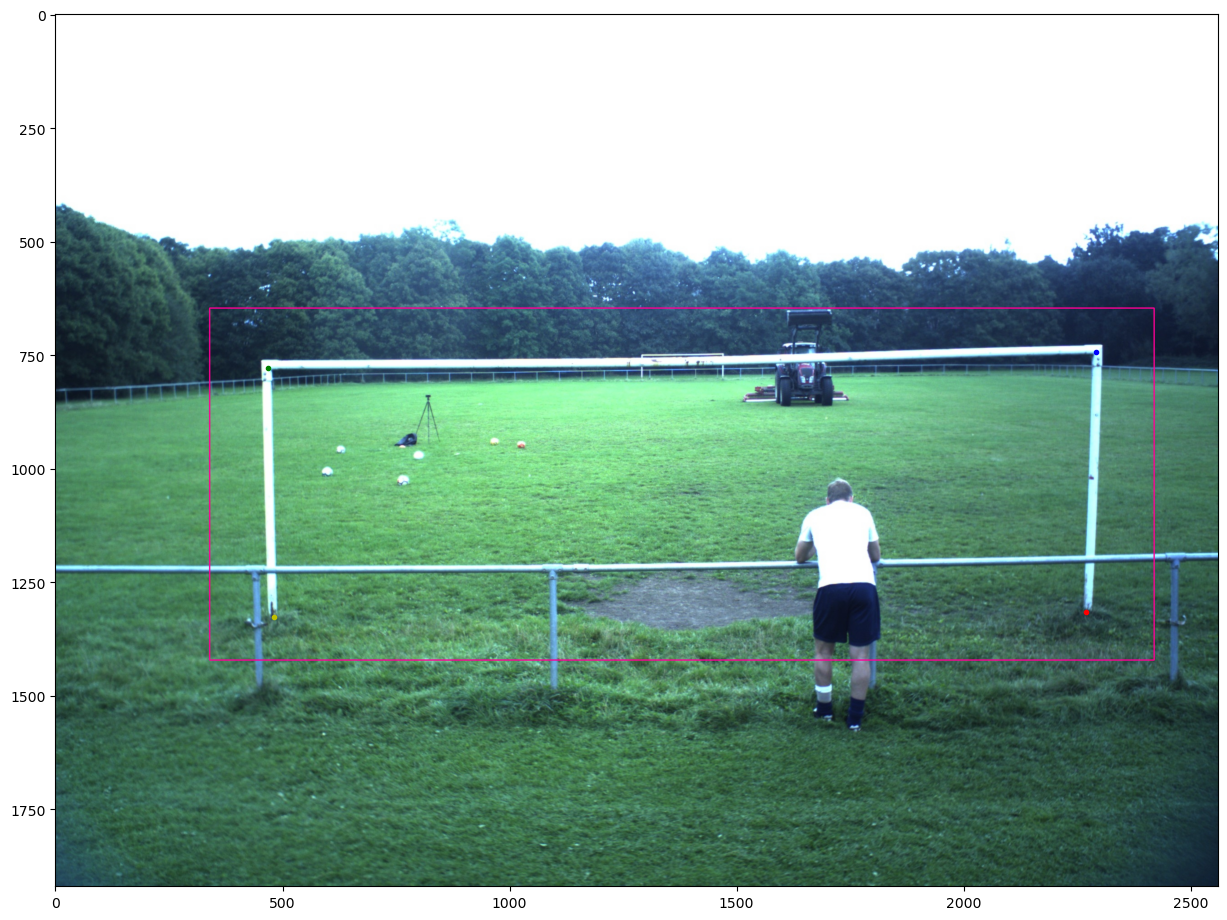

In [4]:
tim, ttarget = data.__getitem__(83)
_,ax = plt.subplots(1,1, figsize=(15,15))
# ax.imshow(to_numpy(tim))
kps = target_to_keypoints(ttarget)
box = torch.cat((torch.min(kps,axis=0)[0]-torch.tensor([tim.shape[2]*0.05,tim.shape[1]*0.05]),torch.max(kps,axis=0)[0]+torch.tensor([tim.shape[2]*0.05,tim.shape[1]*0.05])))
# print(box[0:2]-10)
box = box.detach().cpu().numpy().astype(np.int32).tolist()
# box = ttarget['boxes'].detach().cpu().numpy().astype(np.int32).tolist()[0]
id = ttarget['image_id']
print(f'kps:\n{kps}')
print(f'box:\n{box}')
print(f'id:\n{id}')
ax.plot(*kps[0],'r.')
ax.plot(*kps[1],'g.')
ax.plot(*kps[2],'b.')
ax.plot(*kps[3],'y.')
start_point = (box[0], box[1])
end_point = (box[2], box[3])
image = cv2.rectangle((to_numpy(tim)* 255).astype(np.uint8).copy(), start_point, end_point, (255,0,150), 2)
ax.imshow(image)
